##### 팬시 인덱싱
- 한 번에 여러 배열 요소에 접근하기 위해 인덱서의 배열을 전달하는 것

1. 팬시 인덱싱 알아보기

In [5]:
import numpy as np
rand = np.random.RandomState(42)
x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [6]:
[x[3], x[7], x[2]]

[np.int32(71), np.int32(86), np.int32(14)]

In [7]:
ind = [3,7,4]
x[ind]

array([71, 86, 60], dtype=int32)

In [8]:
# 팬시 인덱싱을 사용하면 결과의 형상이 인덱싱 대상 배열의 형상이 아니라
# 인덱스 배열의 형상을 반영한다
ind = np.array ([[3,7],
                 [4,5]])
x[ind]

array([[71, 86],
       [60, 20]], dtype=int32)

In [9]:
# 팬시 인덱싱은 여러 차원에서도 동작한다
X = np.arange(12).reshape((3,4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [10]:
row = np.array([0,1,2])
col = np.array([2,1,3])
X[row,col]

array([ 2,  5, 11])

In [15]:
row.shape

(3,)

In [14]:
row[:, np.newaxis]

array([[0],
       [1],
       [2]])

In [13]:
row[:, np.newaxis].shape

(3, 1)

In [11]:
X[row[:,np.newaxis],col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [16]:
# 각 행의 값은 산술 연산의 브로드캐스팅에서 본 것과 똑같이 각 열 벡터와 일치
# 팬시 인덱싱을 사용하면 반환값은 
# 인덱싱 대상 배열 형상이 아니라 브로드캐스팅된 인덱스의 형상 반영
row[:,np.newaxis]*col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

2. 결합 인덱싱

In [18]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [20]:
# 팬시 인덱싱과 단순 인덱스의 결합
X[2,[2,0,1]]

array([10,  8,  9])

In [21]:
# 팬시 인덱싱과 슬라이싱의 결합
X[1:,[2,0,1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [22]:
# 팬시 인덱싱과 마스킹의 결합
mask = np.array([1,0,1,0],dtype=bool)
X[row[:,np.newaxis],mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

3. 예제: 임의의 점 선택하기
- 팬시 인덱싱의 보편적 용도는 행렬에서 행의 부분집합을 선택하는 것

In [24]:
mean = [0,0] 
# center of the distribution # the mean vector
# each element in mean vector corresponds to the mean of one of the variables
# in the multivariate distribution
cov = [[1,2],
       [2,5]]
# the covariance matrix
# the covariance matrix specifies the spread and the relationship btw the variables
# the diagonal elements represent the variance of the individual variables
# variance of the first variable is 1 and the variance of the second variable is 5
# the off-diagonal elements represent the covariance btw the variables
# in this case the covariance btw the two variables is 2
X = rand.multivariate_normal(mean,cov,100)
# genereate 100 random samples from a multivariate normal distribution 
# with the specified mean vector(mean) and covariance matrix(cov)
X.shape
# (100,2) each row is a sample from the distribution (100 rows)

(100, 2)

> <공분산 개념 참고>  
> 1. variance(분산)  
> - `a measure of the variability or spread in a set of data`  
> 2. covariance(공분산)   
>   - `a measure of the extent to which corresponding elements from two sets of ordered data move in the same direction. `
>   - `covariance is a measure of how much two random variables change together`  
> 3. covariance matrix = 정방행렬의 값을 분산과 공분산으로 채운 것    
> 4. ref:  
> https://adioshun.gitbooks.io/statics-with-r/content/variance-covariance-matrix.html

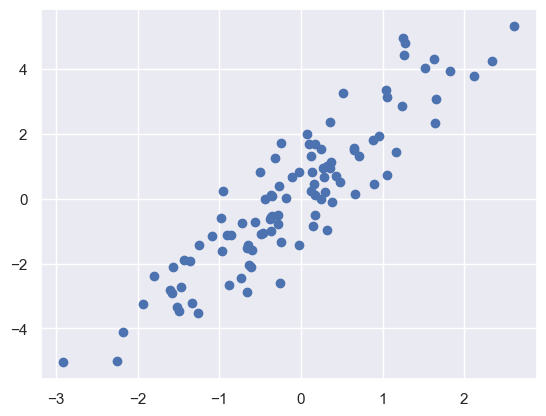

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set_theme()

plt.scatter(X[:,0],X[:,1]);

In [26]:
plt.scatter?

Signature:
plt.scatter(
    x: 'float | ArrayLike',
    y: 'float | ArrayLike',
    s: 'float | ArrayLike | None' = None,
    c: 'ArrayLike | Sequence[ColorType] | ColorType | None' = None,
    marker: 'MarkerType | None' = None,
    cmap: 'str | Colormap | None' = None,
    norm: 'str | Normalize | None' = None,
    vmin: 'float | None' = None,
    vmax: 'float | None' = None,
    alpha: 'float | None' = None,
    linewidths: 'float | Sequence[float] | None' = None,
    *,
    edgecolors: "Literal['face', 'none'] | ColorType | Sequence[ColorType] | None" = None,
    plotnonfinite: 'bool' = False,
    data=None,
    **kwargs,
) -> 'PathCollection'
Docstring:
A scatter plot of *y* vs. *x* with varying marker size and/or color.

Parameters
----------
x, y : float or array-like, shape (n, )
    The data positions.

s : float or array-like, shape (n, ), optional
    The marker size in points**2 (typographic points are 1/72 in.).
    Default is ``rcParams['lines.markersize'] ** 2``.

    Th

In [39]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([19, 86, 48, 30, 83, 32, 33, 98, 16, 62, 69, 72, 35, 66, 70, 26, 79,
       40, 37, 84], dtype=int32)

In [29]:
np.random.choice?

Signature: np.random.choice(a, size=None, replace=True, p=None)
Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

.. versionadded:: 1.7.0

.. note::
    New code should use the `~numpy.random.Generator.choice`
    method of a `~numpy.random.Generator` instance instead;
    please see the :ref:`random-quick-start`.

.. warning::
    This function uses the C-long dtype, which is 32bit on windows
    and otherwise 64bit on 64bit platforms (and 32bit on 32bit ones).
    Since NumPy 2.0, NumPy's default integer is 32bit on 32bit platforms
    and 64bit on 64bit platforms.


Parameters
----------
a : 1-D array-like or int
    If an ndarray, a random sample is generated from its elements.
    If an int, the random sample is generated as if it were ``np.arange(a)``
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  Default is None, in which case a


In [40]:
selection = X[indices] # 여기에 펜시 인덱싱 사용
selection.shape

(20, 2)

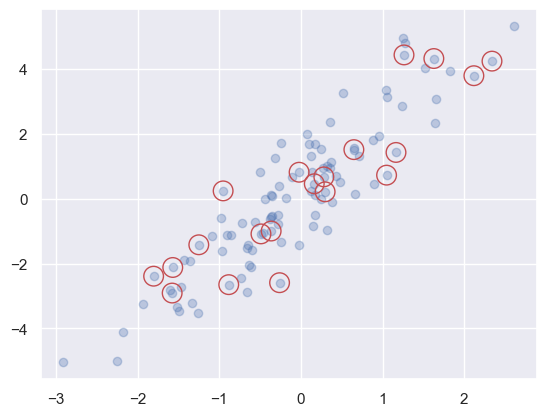

In [ ]:
# 어느 점이 선택됐는지 보기 위해 선택된 점 위에 큰 동그라미 표시
plt.scatter(X[:,0], X[:,1], alpha=0.3)
plt.scatter(selection[:,0],selection[:,1],
            facecolor='none',
            edgecolor='r', s=200);